In [114]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [101]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [102]:
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [103]:
df["ChestPainType"]

0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, Length: 918, dtype: object

In [104]:
df["ChestPainType"].describe()

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

In [105]:
ChestPainType_count = df['ChestPainType'].value_counts()
ChestPainType_Percentage = df['ChestPainType'].value_counts(normalize=True) * 100

ChestPainTypr_table = pd.DataFrame({'Count':ChestPainType_count, 'Percentage %':ChestPainType_Percentage})
ChestPainTypr_table

,Count,Percentage %
ChestPainType,,
ASY,496,54.030501
NAP,203,22.113290
ATA,173,18.845316
TA,46,5.010893


<Axes: ylabel='proportion'>

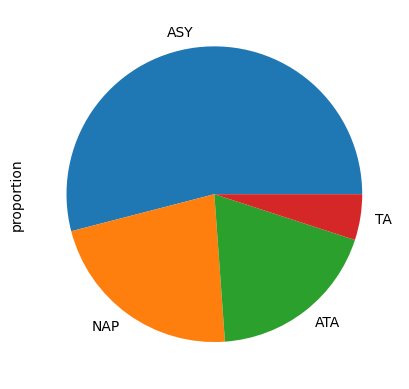

In [106]:
ChestPainType_Percentage.plot(kind="pie")

In [107]:
ChestPainType_AND_ST_Slope=df.groupby("ChestPainType")["ST_Slope"].value_counts()
ChestPainType_AND_ST_Slope_Percent=df.groupby("ChestPainType")["ST_Slope"].value_counts(normalize=True)*100
ChestPainType_ST_Slope_table = pd.DataFrame({'Count':ChestPainType_AND_ST_Slope, 'Percentage %':ChestPainType_AND_ST_Slope_Percent})
ChestPainType_ST_Slope_table


Count  Percentage %
ChestPainType ST_Slope                     
ASY           Flat        318     64.112903
              Up          132     26.612903
              Down         46      9.274194
ATA           Up          138     79.768786
              Flat         32     18.497110
              Down          3      1.734104
NAP           Up          105     51.724138
              Flat         88     43.349754
              Down         10      4.926108
TA            Flat         22     47.826087
              Up           20     43.478261
              Down          4      8.695652

<Axes: xlabel='ChestPainType,ST_Slope'>

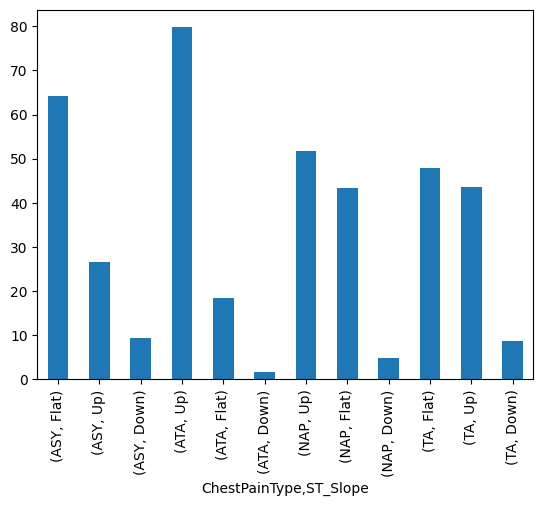

In [108]:
ChestPainType_AND_ST_Slope_Percent.plot(kind="bar")


In [109]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

<Axes: xlabel='Sex'>

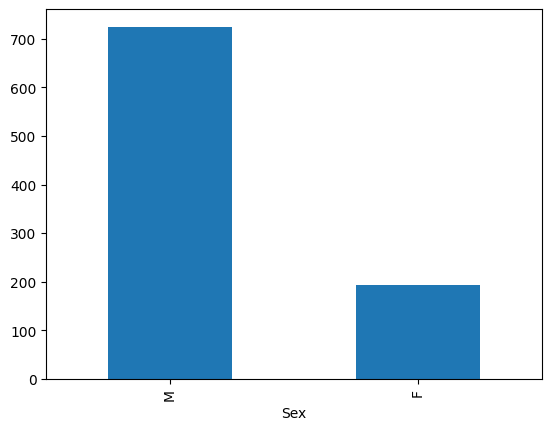

In [110]:
df_gender= df["Sex"].value_counts()
df_gender.plot(kind='bar')

In [111]:
S_HD=df.groupby("Sex")["HeartDisease"].value_counts().sort_values(ascending=False)
S_HD

Sex  HeartDisease
M    1               458
     0               267
F    0               143
     1                50
Name: count, dtype: int64

<Axes: ylabel='count'>

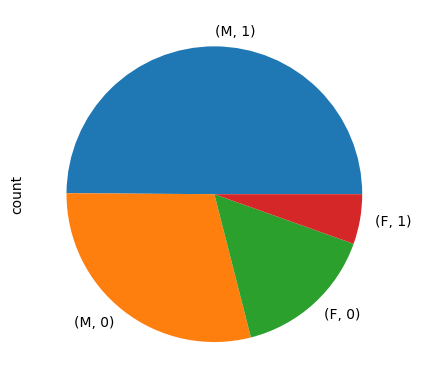

In [112]:
S_HD.plot(kind="pie")

In [116]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: ylabel='count'>

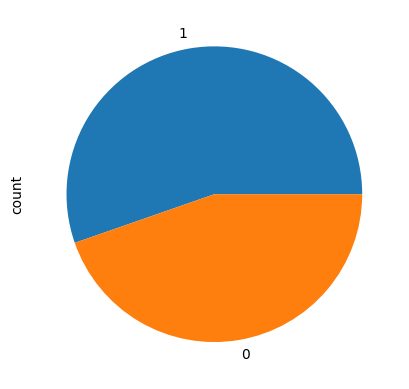

In [117]:
df['HeartDisease'].value_counts().plot(kind='pie')

In [113]:
df.corr(numeric_only=True)['HeartDisease'].sort_values()


MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

<Axes: >

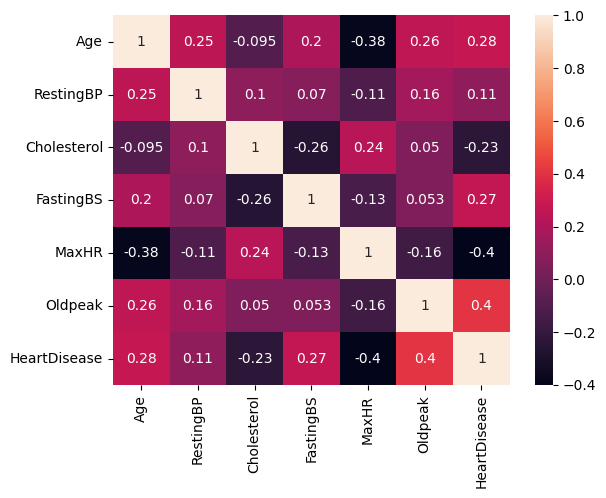

In [115]:
sns.heatmap(df.corr(numeric_only=True),annot=True)